In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('video_latency_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

# Histograma por threshold

<Figure size 1200x600 with 0 Axes>

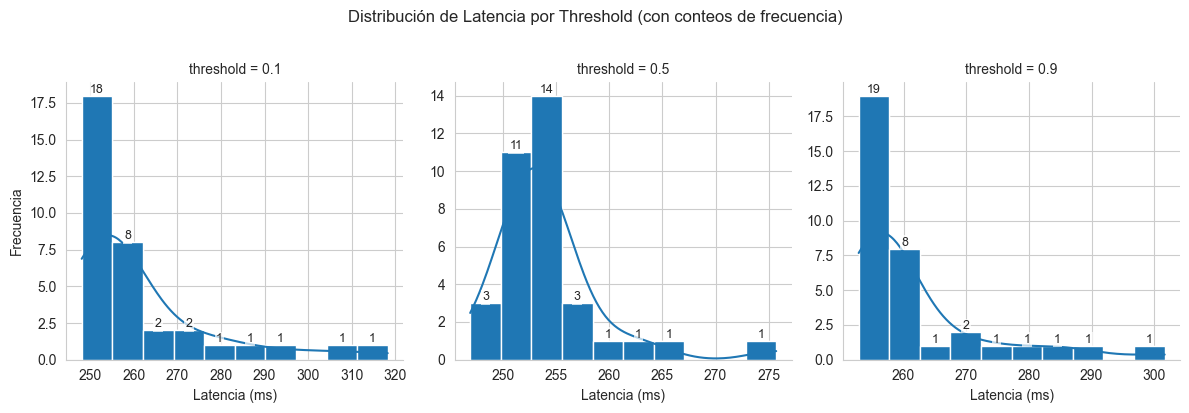

In [2]:
# Función personalizada que añade las frecuencias
def histplot_with_freq(x, color=None, **kwargs):
    # Crear el histograma normal
    ax = sns.histplot(x, bins=10, color=color, kde=True, **kwargs)
    
    # Obtener los datos del histograma
    n, bins, patches = ax.hist(x, bins=10, color=color, **kwargs)
    
    # Agregar las frecuencias encima de cada barra
    for count, patch in zip(n, patches):
        if count > 0:  # Solo mostrar texto si hay frecuencia
            ax.text(patch.get_x() + patch.get_width()/2, 
                    patch.get_height(), 
                    f'{int(count)}', 
                    ha='center', 
                    va='bottom',
                    fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Configuración del estilo
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Crear histogramas separados por threshold con frecuencias
g = sns.FacetGrid(df, col="threshold", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(histplot_with_freq, "latency_ms")

# Añadir títulos y etiquetas
g.set_axis_labels("Latencia (ms)", "Frecuencia")
g.fig.suptitle("Distribución de Latencia por Threshold (con conteos de frecuencia)", y=1.02)

plt.tight_layout()
plt.show()

In [3]:
# Agrupando resultados por threshold
resultados = df.groupby(['video', 'threshold'])['latency_ms'].agg(['max', 'min', 'mean']).reset_index()
resultados.columns = ['video', 'threshold', 'latencia_maxima', 'latencia_minima', 'latencia_promedio']

print(resultados.to_string())

                      video  threshold  latencia_maxima  latencia_minima  latencia_promedio
0  ejercicio01 - frente.mp4        0.1       318.258047       248.062849         261.562422
1  ejercicio01 - frente.mp4        0.5       275.698900       246.928930         254.229116
2  ejercicio01 - frente.mp4        0.9       301.656246       252.830982         261.336211


/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_16831/4256022892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


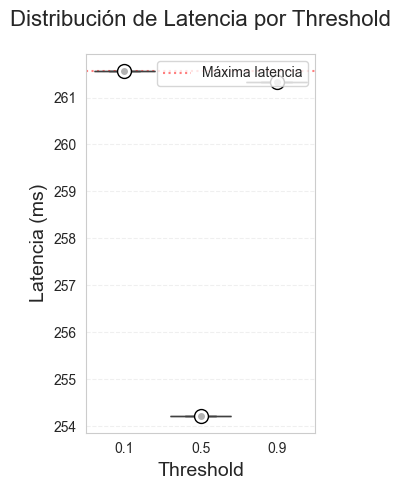

In [5]:
plt.figure(figsize=(3.15, 5))  # Aumentar tamaño para mejor legibilidad

# Boxplot para latencia con estilo mejorado
sns.boxplot(
    data=resultados,
    x='threshold',
    y='latencia_promedio',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':10},
    palette='Blues'  # Cambiar paleta de colores
)

# Añadir puntos individuales con estilo mejorado
sns.stripplot(
    data=resultados, 
    x='threshold', 
    y='latencia_promedio',
    color='black', 
    alpha=0.3,  # Reducir transparencia
    jitter=0.2,  # Controlar dispersión
    size=5  # Tamaño de puntos
)

# Personalización del gráfico
plt.title('Distribución de Latencia por Threshold', fontsize=16, pad=20)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Latencia (ms)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Añadir anotaciones de estadísticas (opcional - necesitarías calcular las estadísticas primero)
# latencia_stats = resultados.groupby('threshold')['latencia_promedio'].agg(['count', 'mean', 'std'])
# for i, threshold in enumerate(latencia_stats.index):
#     plt.text(
#         i, resultados['latencia_promedio'].max()*1.05,
#         f"n={int(latencia_stats.loc[threshold, 'count'])}\nμ={latencia_stats.loc[threshold, 'mean']:.1f} ± {latencia_stats.loc[threshold, 'std']:.1f}",
#         ha='center',
#         fontsize=12,
#         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
#     )

# Añadir línea horizontal de referencia (opcional)
max_latencia = resultados['latencia_promedio'].max()
plt.axhline(y=max_latencia, color='red', linestyle=':', alpha=0.5, label='Máxima latencia')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()